-----------------------------------------------------
*** Программа визуализации гармонического сигнала ***
------------------Введенные данные:------------------
Частота сигнала (Гц)                           =  500
Амплитуда сигнала (усл.ед.)                    =  5
Фаза сигнала, рад                              =  30
Количество периодов сигнала                    =  5
Коэффициент уменьшения интервала дискретизации =  5
-----------------------------------------------------
Интервал наблюдения =  0.01  сек
Количество точек в интервале наблюдения для дискретизации Найквиста =  10.0
Количество точек в интервале наблюдения для интервала дискретизации, пригодного для визуализации =  50.0


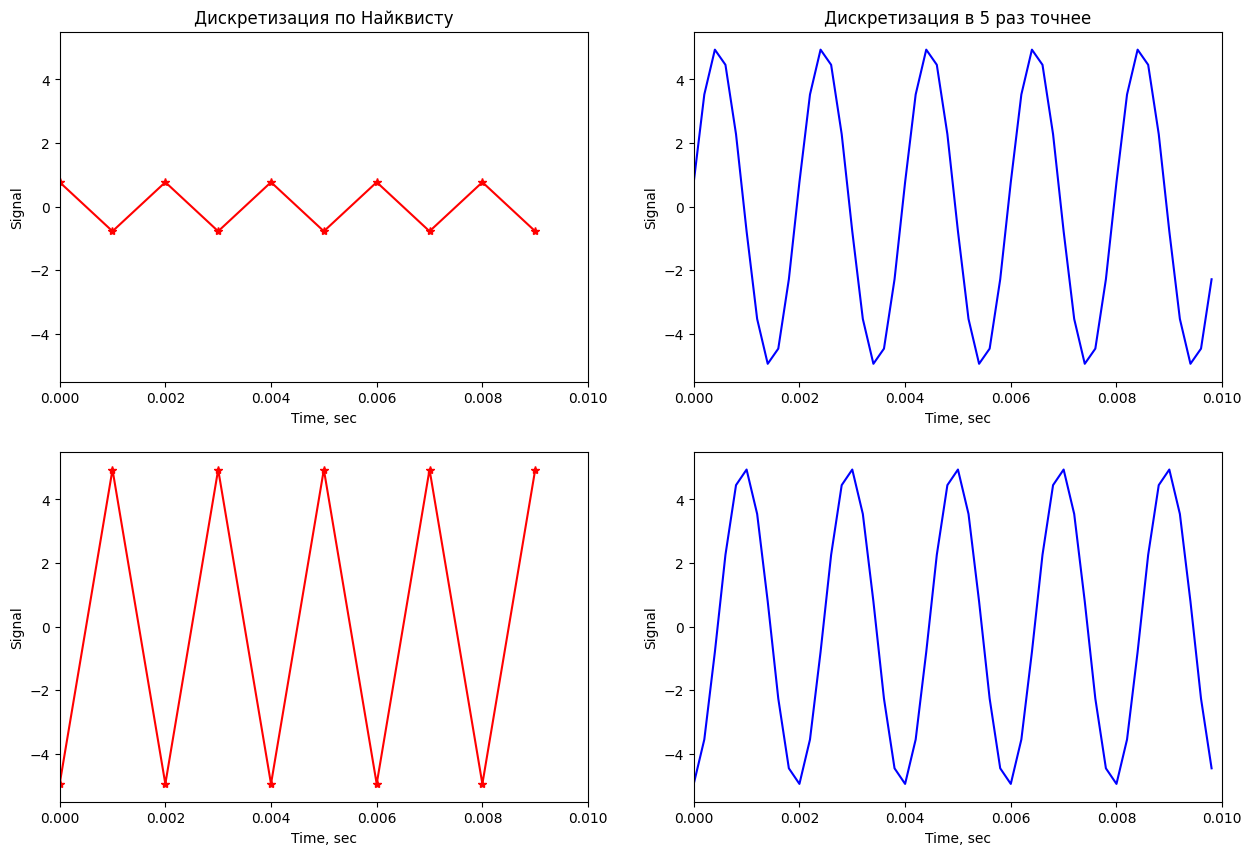

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print('-----------------------------------------------------')
print('*** Программа визуализации  гармонического сигнала ***')

if True:
    f0 = 500
    A = 5
    phi = 30
    NT = 5
    mvis = 5
else:
    # region Ввод частоты и амплитуды сигнала
    print('-------------------Введите данные:-------------------')
    f0 = int(input('Введите частоту сигнала в герцах: '))
    A = int(input('Введите амплитуду сигнала в условных единицах: '))
    phi = int(input('Введите фазу сигнала, рад: '))
    NT = int(input('Введите количество периодов наблюдения, ед.: '))
    mvis = int(input('Введите коэффициент уменьшения интервала дискретизации: '))
    print('-----------------------------------------------------')
    # endregion
'''
-------------------Введите данные:-------------------
Введите частоту сигнала в герцах: 500
Введите амплитуду сигнала в условных единицах: 5
Введите фазу сигнала, рад: 30
Введите количество периодов наблюдения, ед.: 5
Введите коэффициент уменьшения интервала дискретизации: 5
-----------------------------------------------------
'''

# region Вывод введенных данных

print('------------------Введенные данные:------------------')
print('Частота сигнала (Гц)                           = ', str(f0))
print('Амплитуда сигнала (усл.ед.)                    = ', str(A))
print('Фаза сигнала, рад                              = ', str(phi))
print('Количество периодов сигнала                    = ', str(NT))
print('Коэффициент уменьшения интервала дискретизации = ', str(mvis))
print('-----------------------------------------------------')

w = 2 * np.pi * f0  # Переход к круговой частоте (рад/сек)
T = 1 / f0  # Период исходного сигнала (сек)
dtn = np.pi / w  # Интервал дискретизации Найквиста (теорема Котельникова)
dtv = dtn / mvis  # Интервал дискретизации, пригодный для визуализации
Tnab = NT * T  # Интервал наблюдения (сек)
print('Интервал наблюдения = ', str(Tnab), ' сек')

Nn = Tnab / dtn  # Количество точек в интервале наблюдения для дискретизации Найквиста
Nv = Tnab / dtv  # Количество точек в интервале наблюдения для интервала дискретизации, пригодного для визуализации
print('Количество точек в интервале наблюдения для дискретизации Найквиста = ', Nn)

print('Количество точек в интервале наблюдения для интервала дискретизации, пригодного для визуализации = ', Nv)

# Вектор времени (сек), дискретизированный в соответствии с критерием Найквиста
tn = np.multiply(dtn, np.arange(0, Nn))
# и c интервалом дискретизации, пригодным для визуализации
tv = np.multiply(dtv, np.arange(0, Nv))
# Вектора сигналов, дискретизированных в соответствии с критерием Найквиста
y1n = A * np.cos(w * tn + phi)
y2n = A * np.sin(w * tn + phi)
# Вектора сигналов, дискретизированных c интервалом дискретизации, пригодным для визуализации
y1v = A * np.cos(w * tv + phi)
y2v = A * np.sin(w * tv + phi)


fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.axis([0, Tnab, -1.1 * A, 1.1 * A])
plt.title('Дискретизация по Найквисту')
plt.xlabel('Time, sec')
plt.ylabel('Signal')
plt.plot(tn, y1n, 'r-*')

plt.subplot(2, 2, 2)
plt.plot(tv, y1v, 'b')
plt.axis([0, Tnab, -1.1 * A, 1.1 * A])
plt.title('Дискретизация в ' + str(mvis) + ' раз точнее')
plt.xlabel('Time, sec')
plt.ylabel('Signal')

plt.subplot(2, 2, 3)
plt.plot(tn, y2n, 'r-*')
plt.axis([0, Tnab, -1.1 * A, 1.1 * A])
plt.xlabel('Time, sec')
plt.ylabel('Signal')

plt.subplot(2, 2, 4)
plt.plot(tv, y2v, 'b')
plt.axis([0, Tnab, -1.1 * A, 1.1 * A])
plt.xlabel('Time, sec')
plt.ylabel('Signal')

plt.show()